In [152]:
## Machine Learning Online Class
#  Exercise 7 | Principle Component Analysis and K-Means Clustering
#
#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  exercise. You will need to complete the following functions:
#
#     pca.m
#     projectData.m
#     recoverData.m
#     computeCentroids.m
#     findClosestCentroids.m
#     kMeansInitCentroids.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import lib.calc as calc
import lib.plotting as libplt
import importlib
importlib.reload(libplt)

<module 'lib.plotting' from '..\\lib\\plotting.py'>

# 1. 加载示例数据集

Visualizing example dataset for PCA.




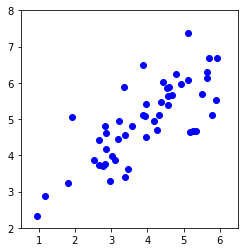

In [93]:
## ================== Part 1: Load Example Dataset  ===================
#  We start this exercise by using a small dataset that is easily to
#  visualize
#
print('Visualizing example dataset for PCA.\n\n');

#  The following command loads the dataset. You should now have the 
#  variable X in your environment
data = scio.loadmat ('ex7data1.mat');
X = data['X']


#  Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bo')
plt.axis([0.5, 6.5, 2, 8]);
#axis square;
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# 2. 主成分分析

In [187]:
def pca(X):
    #PCA Run principal component analysis on the dataset X
    #   [U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X
    #   Returns the eigenvectors U, the eigenvalues (on diagonal) in S
    #

    # Useful values
    m, n = X.shape

    # You need to return the following variables correctly.
    U = np.zeros((n))
    S = np.zeros((n))

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should first compute the covariance matrix. Then, you
    #               should use the "svd" function to compute the eigenvectors
    #               and eigenvalues of the covariance matrix. 
    #
    # Note: When computing the covariance matrix, remember to divide by m (the
    #       number of examples).
    #
    sigma = X.T@X / m
    U, S, V = np.linalg.svd(sigma)
    
    #print(U,'\n',S,'\n',V)
    return U, S
    # =========================================================================

测试用例

In [95]:
U, S = pca(np.sin(np.array([[0, 1], [2, 3], [4, 5]])))

[[-0.65434733 -0.75619414]
 [-0.75619414  0.65434733]] 
 [ 0.79551195  0.22018667] 
 [[-0.65434733 -0.75619414]
 [-0.75619414  0.65434733]]


测试通过


Running PCA on example dataset.


[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] 
 [ 1.73553038  0.26446962] 
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


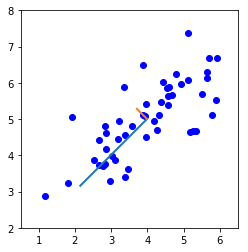

Top eigenvector: 

 U[:,0] = -0.707107 -0.707107 


(you should expect to see -0.707107 -0.707107)



In [96]:
## =============== Part 2: Principal Component Analysis ===============
#  You should now implement PCA, a dimension reduction technique. You
#  should complete the code in pca.m
#
print('\nRunning PCA on example dataset.\n\n');

#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = calc.featureNormalize(X);

#  Run PCA
U, S = pca(X_norm)

#  Compute mu, the mean of the each feature

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
plt.plot(X[:, 0], X[:, 1], 'bo')
plt.axis([0.5, 6.5, 2, 8]);
libplt.drawLine(mu, mu + 1.5 * S[0] * U[:,0].T, '-k', linewidth = 2);
libplt.drawLine(mu, mu + 1.5 * S[1] * U[:,1].T, '-k', linewidth = 2);
plt.gca().set_aspect('equal', adjustable='box')


plt.show()

print('Top eigenvector: \n');
print(' U[:,0] = %f %f \n'%(U[0,0], U[1,0]))
print('\n(you should expect to see -0.707107 -0.707107)\n');

# 3. 降维

In [105]:
def projectData(X, U, K):
    #PROJECTDATA Computes the reduced data representation when projecting only 
    #on to the top k eigenvectors
    #   Z = projectData(X, U, K) computes the projection of 
    #   the normalized inputs X into the reduced dimensional space spanned by
    #   the first K columns of U. It returns the projected examples in Z.
    #

    # You need to return the following variables correctly.
    Z = np.zeros((len(X), K))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the projection of the data using only the top K 
    #               eigenvectors in U (first K columns). 
    #               For the i-th example X(i,:), the projection on to the k-th 
    #               eigenvector is given as follows:
    #                    x = X(i, :)';
    #                    projection_k = x' * U(:, k);
    #
    # Z should be m*K dimension, U: n*n
    Z = X @ U[:,:K]
    # =============================================================
    '''for i in range(len(X)):
        for k in range(K):
            x = np.array(X[i, :]).reshape(-1,1)
            project_k = x.T.dot(U[:,k])
            Z[i,k] = project_k'''

    return Z


测试用例

In [123]:
X_test = np.sin(np.reshape(range(0,12),(4,3),order='F'))
projectData(X_test, calc.magic(3), 2)

array([[ 1.6870255 ,  5.12021174],
       [ 5.503469  , -0.24408402],
       [ 4.26004848, -5.38397006],
       [-0.90004097, -5.57385886]])

测试通过

In [113]:
def recoverData(Z, U, K):
    #RECOVERDATA Recovers an approximation of the original data when using the 
    #projected data
    #   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the 
    #   original data that has been reduced to K dimensions. It returns the
    #   approximate reconstruction in X_rec.
    #

    # You need to return the following variables correctly.
    X_rec = np.zeros((len(Z), len(U)))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the approximation of the data by projecting back
    #               onto the original space using the top K eigenvectors in U.
    #
    #               For the i-th example Z(i,:), the (approximate)
    #               recovered data for dimension j is given as follows:
    #                    v = Z(i, :)';
    #                    recovered_j = v' * U(j, 1:K)';
    #
    #               Notice that U(j, 1:K) is a row vector.
    #               
    #X_rec : m*n, U: n*n, U[:,:K]: n*K, Z:m*K
    X_rec = Z @ U[:,:K].T


    # =============================================================

    return X_rec

测试用例

In [122]:
Q = np.reshape(np.array(range(1,16)),(5,3),order='F')
recoverData(Q, calc.magic(5), 3)

array([[172, 130, 183, 291, 394],
       [214, 165, 206, 332, 448],
       [256, 200, 229, 373, 502],
       [298, 235, 252, 414, 556],
       [340, 270, 275, 455, 610]])

测试通过


Dimension reduction on example dataset.


Projection of the first example: 1.496313


(this value should be about 1.481274)


Approximation of the first example: -1.058053 -1.058053


(this value should be about  -1.047419 -1.047419)




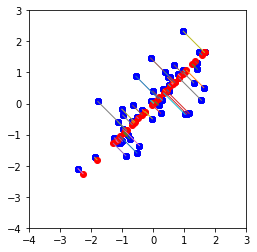

In [116]:
# =================== Part 3: Dimension Reduction ===================
#  You should now implement the projection step to map the data onto the 
#  first k eigenvectors. The code will then plot the data in this reduced 
#  dimensional space.  This will show you what the data looks like when 
#  using only the corresponding eigenvectors to reconstruct it.
#
#  You should complete the code in projectData.m
#
print('\nDimension reduction on example dataset.\n\n');

#  Plot the normalized dataset (returned from pca)
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
plt.axis([-4, 3, -4, 3]); 
#axis square
plt.gca().set_aspect('equal', adjustable='box')

#  Project the data onto K = 1 dimension
K = 1;
Z = projectData(X_norm, U, K);
print('Projection of the first example: %f\n'%Z[0]);
print('\n(this value should be about 1.481274)\n\n');

X_rec  = recoverData(Z, U, K);
print('Approximation of the first example: %f %f\n'%(X_rec[0, 0], X_rec[0, 1]))
print('\n(this value should be about  -1.047419 -1.047419)\n\n');

#  Draw lines connecting the projected points to the original points
#hold on;
plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro');
for i in range(len(X_norm)):
    libplt.drawLine(X_norm[i,:], X_rec[i,:], '--k', linewidth = 1);
plt.show()

测试用例

In [88]:
X_test = np.sin(np.reshape(range(0,12),(4,3),order='F'))
magic = np.array([8,1,6,3,5,7,4,9,2]).reshape(3,3)
projectData(X_test, magic, 2)

array([[ 1.6870255 ,  5.12021174],
       [ 5.503469  , -0.24408402],
       [ 4.26004848, -5.38397006],
       [-0.90004097, -5.57385886]])

测试通过，为什么在X_norm上结果不准确？(使用向量方法和循环方法结果一样）

In [107]:
Z

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789],
       [-0.6316777 ],
       [-0.55280135],
       [-0.0896816 ],
       [-0.5258541 ],
       [ 1.56415455],
       [-1.91610366],
       [-0.88679735],
       [ 0.95607375],
       [-2.32995679],
       [-0.47793862],
       [-2.21747195],
       [ 0.38900633],
       [-1.78482346],
       [ 0.05175486],
       [ 1.66512392],
       [ 0.50813572],
       [-1.23711018],
       [-1.17198677],
       [ 0.84221686],
       [-0.00693174],
       [-0.22794195],
       [-1.51309518],
       [ 1.33874082],
       [-0.5925244 ],
       [ 0.67907605],
       [-1.35298   ],
       [ 1.68749495],
       [-1.39235931],
       [ 2.55992598],
       [-0.27850702],
       [-0.97677692],
       [ 0.88820006],
       [ 1.29666127],
       [-0.98966774],
       [ 1.81272352],
       [-0

# 4. 加载和可视化人脸数据集


Loading face dataset.


m, n: 100, 1024


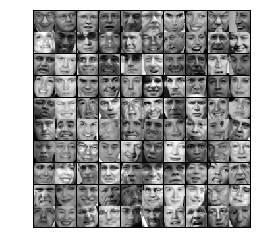

In [238]:
## =============== Part 4: Loading and Visualizing Face Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  The following code will load the dataset into your environment
#
print('\nLoading face dataset.\n\n');

#  Load Face dataset
data = scio.loadmat ('ex7faces.mat')
X = data['X'] #5000,1024

#  Display the first 100 faces in the dataset
libplt.displayData(X[:100, :])
plt.show()

In [247]:
X.shape #单色

(5000, 1024)

# 5. 人脸数据集上的PCA: 特征人脸

['\nRunning PCA on face dataset.\n(this might take a minute or two ...)\n\n']
m, n: 36, 1024


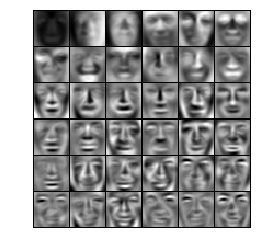

In [239]:
## =========== Part 5: PCA on Face Data: Eigenfaces  ===================
#  Run PCA and visualize the eigenvectors which are in this case eigenfaces
#  We display the first 36 eigenfaces.
#
print(['\nRunning PCA on face dataset.\n' \
         '(this might take a minute or two ...)\n\n']);

#  Before running PCA, it is important to first normalize X by subtracting 
#  the mean value from each feature
X_norm, mu, sigma = calc.featureNormalize(X)

#  Run PCA
U, S = pca(X_norm);

#  Visualize the top 36 eigenvectors found
libplt.displayData(U[:, :36].T) 
plt.show()

由于displayData函数用数据的列数的开方值作为宽度，因此正好输出6 * 6张小图，
实际每张小图都是输出了最具variance的前36个特征

约到后面越模糊是因为variance越来越小

为什么前面的刚好能拼出一个脸的形状？

['\nRunning PCA on face dataset.\n(this might take a minute or two ...)\n\n']
m, n: 4, 1024


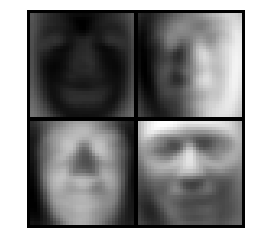

In [240]:
print(['\nRunning PCA on face dataset.\n' \
         '(this might take a minute or two ...)\n\n']);

libplt.displayData(U[:, :4].T)
plt.show()

# 6. 人脸的维度缩减

In [241]:
## ============= Part 6: Dimension Reduction for Faces =================
#  Project images to the eigen space using the top k eigenvectors 
#  If you are applying a machine learning algorithm 
print('\nDimension reduction for face dataset.\n\n');

K = 100;
Z = projectData(X_norm, U, K);
print(Z.shape)

print('The projected data Z has a size of: ')
print('%d '%len(Z))


Dimension reduction for face dataset.


(5000, 100)
The projected data Z has a size of: 
5000 


# 7. 可视化PCA降维后的人脸


Visualizing the projected (reduced dimension) faces.


m, n: 100, 1024
m, n: 100, 1024


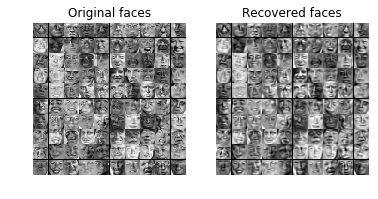

In [242]:
## ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
#  Project images to the eigen space using the top K eigen vectors and 
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed

print('\nVisualizing the projected (reduced dimension) faces.\n\n');

K = 100;
X_rec  = recoverData(Z, U, K);

# Display normalized data
plt.subplot(1, 2, 1);
libplt.displayData(X_norm[:100,:])
plt.title('Original faces');
#axis square;
#plt.gca().set_aspect('equal', adjustable='box')

# Display reconstructed data from only k eigenfaces
plt.subplot(1, 2, 2);
libplt.displayData(X_rec[:100,:])
plt.title('Recovered faces');
#axis square;
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [233]:
importlib.reload(libplt)

<module 'lib.plotting' from '..\\lib\\plotting.py'>

# 8a. PCA做可视化

In [313]:
from scipy.misc import imread
from mpl_toolkits.mplot3d.axes3d import Axes3D
import kMeans

importlib.reload(kMeans)

## === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===
#  One useful application of PCA is to use it to visualize high-dimensional
#  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
#  pixel colors of an image. We first visualize this output in 3D, and then
#  apply PCA to obtain a visualization in 2D.


# Reload the image from the previous exercise and run K-Means on it
# For this to work, you need to complete the K-Means assignment first
A = imread('bird_small.png')

# If imread does not work for you, you can try instead
#   load ('bird_small.mat');

A = A / 255;
img_size = A.shape
X = np.reshape(A, (img_size[0] * img_size[1], 3))
K = 16; 
max_iters = 10;
initial_centroids = kMeans.kMeansInitCentroids(X, K);
centroids, idx = kMeans.runkMeans(X, initial_centroids, max_iters)



K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...

K-Means iteration 10/10...



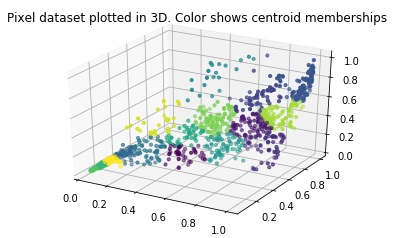

In [315]:
#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
#sel = np.floor(np.random.rand(1000, 1) * len(X)) + 1;
sel = (np.floor(np.random.rand(1000, 1) * len(X))).astype(int)
#print(sel) 1000*1

'''#  Setup Color Palette
palette = hsv(K);
colors = palette(idx(sel), :);'''

#  Visualize the data and centroid memberships in 3D
plt.figure
#Axes3D.scatter3D(X[sel, 0], X[sel, 1], X(sel, 2), 10, c=idx.ravel())
ax = plt.axes(projection='3d') 
ax.scatter3D(X[sel, 0], X[sel, 1], X[sel, 2], s=10, c = idx[sel].ravel())
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships');
plt.show()

# 8b. 使用PCA把图映射到2D空间

(1000, 2)


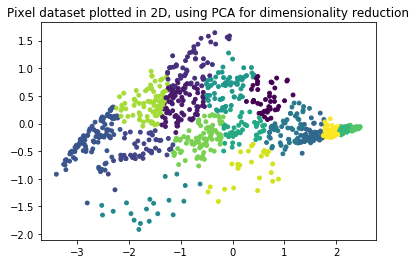

In [319]:
## === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===
# Use PCA to project this cloud to 2D for visualization

# Subtract the mean to use PCA
X_norm, mu, sigma = calc.featureNormalize(X)

# PCA and project the data to 2D
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

# Plot in 2D
plt.figure;
# sel is of 1000*1 shape
libplt.plotDataPoints(Z[sel.ravel(), :], idx[sel.ravel()], K)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');
plt.show()